In [1]:
wd <- dirname(dirname(getwd()))
source(paste0(wd,"/mission_control/treasure_map.R"))
library(tidyverse)
library(gridExtra)
library(ggpubr)
o_dir <- paste0(FIG_DIR ,"supplement_main/")

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.1
Warning message:
“package ‘tibble’ was built under R version 3.6.3”Warning message:
“package ‘tidyr’ was built under R version 3.6.3”Warning message:
“package ‘purrr’ was built under R version 3.6.3”Warning message:
“package ‘dplyr’ was built under R version 3.6.3”Warning message:
“package ‘forcats’ was built under R version 3.6.3”── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attach

#### racers ready

In [2]:
ready <- readRDS(paste0(TMP_DIR, "exhaustive-plots-highlights2.Rds"))

##### Settings

In [3]:
options(repr.plot.height = 4, repr.plot.width = 4)

In [4]:
base_theme <- theme_classic(base_size = 11) 
theme <- (
    base_theme + 
    theme(
        axis.title.y=element_blank(), 
        plot.title = element_text(hjust = 0.5, size = 11),
        axis.title.x =element_text(size=11),
        axis.text =element_text(size=11),
        legend.position="none"
    )
)

In [5]:
color_map <- list(
    "Pretr" = '#9E7788',
    "TGFB" = "#BEBADA",
    "Prolif" = "#8DD3C7",
    "T-cell" = '#FB8072',
    "TMB" = '#80B1D3'
)
alpha_map <- list( "high" = 1, "medium" = .5, "low" = .2)
dir_map <- list("better" = "#1A9850", "worse" = "#D73027", "none" = "Dark Grey") 

In [6]:
est_plot <- function(i = "rna"){
    (
    ggplot( 
        data= ready[[i]]$est, 
        aes(x=est, y=feature, xmin=ci_low, xmax=ci_high, color = dir, alpha = .7)) +
        geom_pointrange(lwd = .4) + 
        geom_vline(xintercept=0, lty=2, col = "grey") +  
        scale_color_manual(values = unlist(dir_map)) + 
        scale_x_continuous( n.breaks = 2) + 
        facet_grid( cols = vars(model), rows = vars(go_group), scales = "free", space = "free_y") +
        ggtitle( "Univariate Models (Covariate Adjusted)") + 
        xlab("Coefficient Estimate (99.99% CI)") + 
        theme
    )
}

In [7]:
#ready[["rna"]]$cors

In [8]:
cor_plot <- function(i = "rna"){(
    ggplot( ready[[i]]$cors , aes(x=cor, y=feature, fill = latent, label = cor, alpha = alpha, color = cor < 0)) + 
    geom_col( width = 0.7, size = .15) + 
    scale_fill_manual(values = unlist(color_map)) + 
    scale_alpha_manual(values = unlist(alpha_map)) + 
    scale_color_manual(values = unlist(list("TRUE" = "white", "FALSE" = "black"))) + 
    ggtitle( "Correlations with Latent Factors") + 
    xlab("Correlations with Latent Factors") + 
    scale_x_continuous( breaks = c(-1,0,1), limits = c(-1,1)) + 
    facet_grid( cols = vars(latent), rows = vars(go_group), scales = "free", space = "free_y") + 
    theme + theme( axis.text.y = element_blank())
)}

In [9]:
color_strips <- function(gg){
  g <- ggplot_gtable(ggplot_build(gg))
  strips <- which(grepl('strip', g$layout$name))
  pal <- c('#80B1D3', '#FB8072', '#BEBADA','#8DD3C7', '#9E7788')
  for (i in seq_along(strips)) {
    k <- which(grepl('rect', g$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
    g$grobs[[strips[i]]]$grobs[[1]]$children[[k]]$gp$fill <- pal[i] 
  } 
  as_ggplot(g)
}

In [10]:
together_plot <- function(i = "rna", title = "X"){
    ests <- est_plot(i)
    cors <- color_strips(cor_plot(i))
    as_ggplot(arrangeGrob(ests, cors, layout_matrix = rbind(c(1,1,1,2,2)))) + ggtitle(title)
}

#### Put together

In [11]:
get_ready <- function( gg, title = "Response", hjust = .65, size = 15){
    gg + ggtitle(title) + theme(plot.margin = unit(rep(.1,4), "cm"), plot.title = element_text(hjust = hjust, size = size, vjust = 0))
}
annote <- function( i, lab, size = 12 ) as_ggplot(arrangeGrob(annotate_figure( i, fig.lab = lab, fig.lab.size = size, fig.lab.face = "bold")))

In [12]:
options(repr.plot.height = 8, repr.plot.width = 10)
cln_hla <- get_ready(annote(together_plot("cln_hla"), "A"), "Top Clinical and HLA features")
cnv_sv <- get_ready(annote(together_plot("cnv_sv"), "C"), "Top CNV and SV features")
somatic <- get_ready(annote(together_plot("somatic"), "B"), "Top Somatic features")
rna <- get_ready(annote(together_plot("rna"), "D"), "Top Transcriptomic features")

Warning message:
“Removed 5 rows containing missing values (geom_pointrange).”Warning message:
“Removed 18 rows containing missing values (geom_pointrange).”Warning message:
“Removed 29 rows containing missing values (geom_pointrange).”

In [13]:
lay <- cbind(c(1,1,2,2,2,3,3,3),c(1,1,2,2,2,3,3,3),c(1,1,2,2,2,3,3,3),c(1,1,2,2,2,3,3,3),c(1,1,2,2,2,3,3,3),c(1,1,2,2,2,3,3,3),c(1,1,2,2,2,3,3,3),c(1,1,2,2,2,3,3,3),c(1,1,2,2,2,3,3,3),
      c(4,4,4,4,4,4,4),c(4,4,4,4,4,4,4),c(4,4,4,4,4,4,4),c(4,4,4,4,4,4,4),c(4,4,4,4,4,4,4),c(4,4,4,4,4,4,4),c(4,4,4,4,4,4,4),c(4,4,4,4,4,4,4),c(4,4,4,4,4,4,4),c(4,4,4,4,4,4,4))

Warning message in cbind(c(1, 1, 2, 2, 2, 3, 3, 3), c(1, 1, 2, 2, 2, 3, 3, 3), c(1, :
“number of rows of result is not a multiple of vector length (arg 10)”

In [14]:
together <- as_ggplot(arrangeGrob(cln_hla, somatic, cnv_sv, rna, layout_matrix = lay))

In [15]:
options(repr.plot.height = 20, repr.plot.width = 18)
lets_go <- get_ready(together, "HMF CPI Exhaustive Analysis", size = 20, hjust = .5)

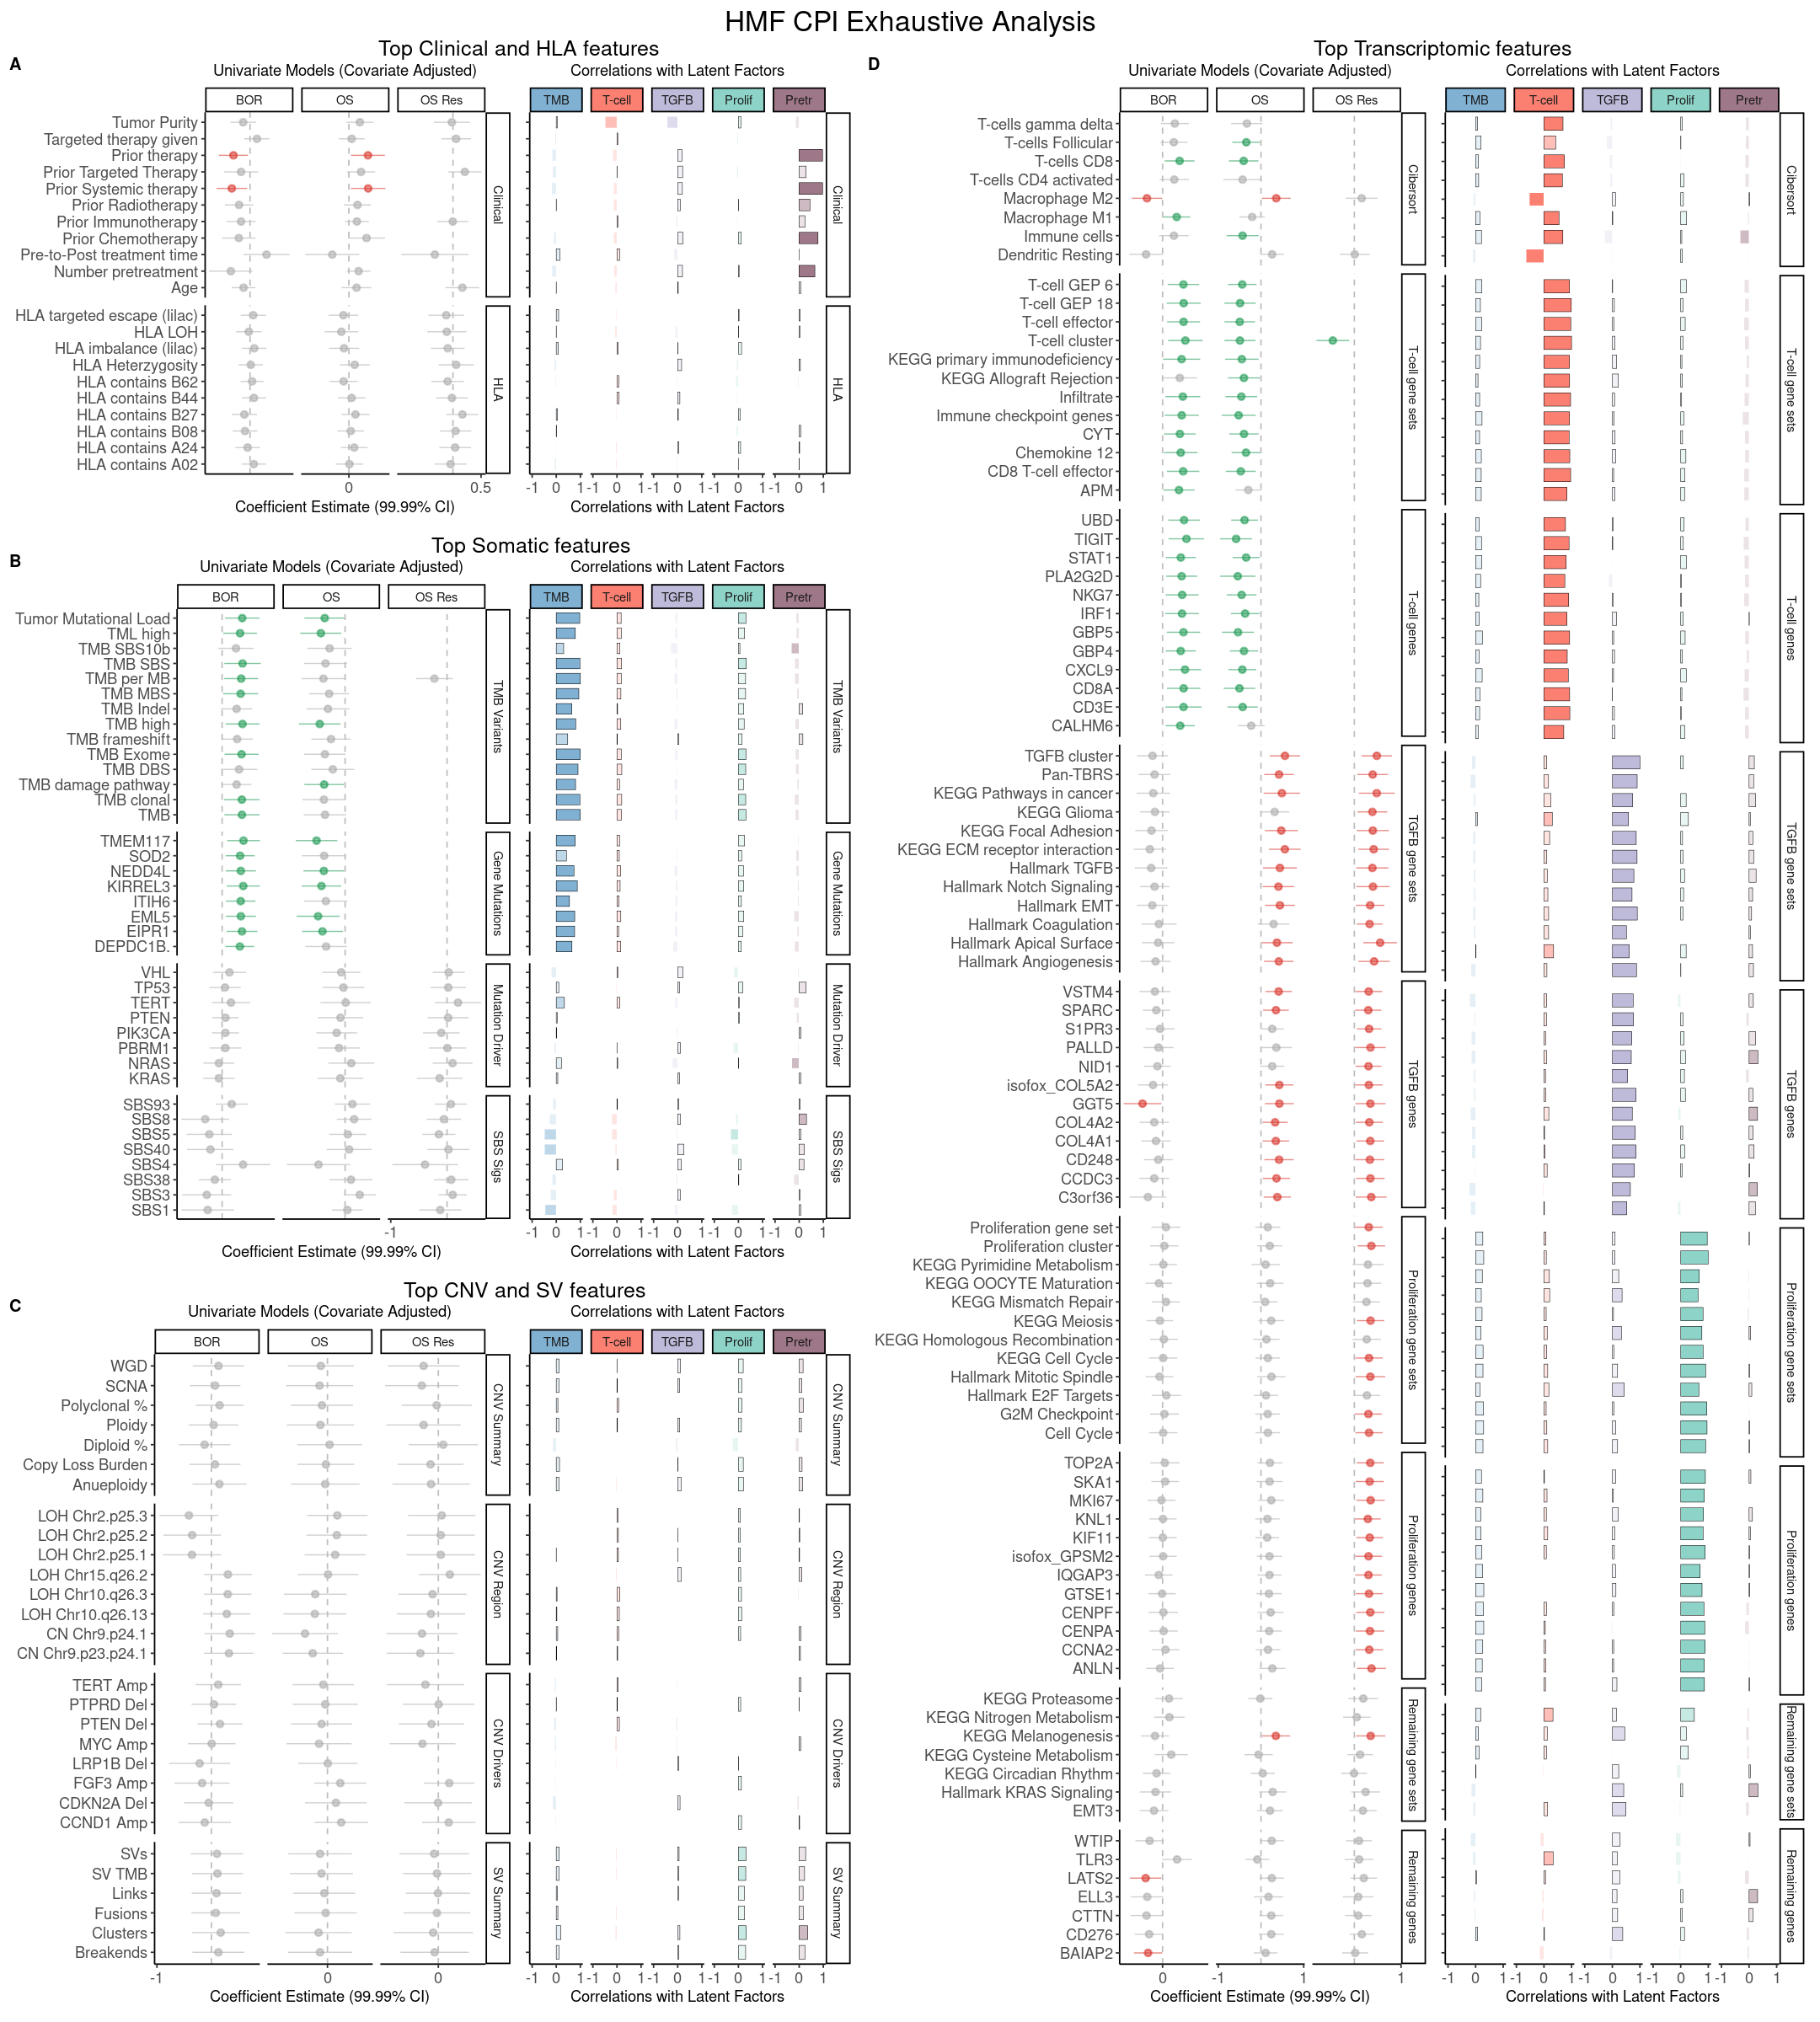

In [17]:
lets_go
ggsave( paste0(FIG_FINAL_DIR, "4_sm_exhaustive_highlights.png"), width = 18, height = 20, dpi = 1000)